In [125]:
library(GenomicRanges)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
library(org.Hs.eg.db)
library(annotate)
library(stringr)
library(XML)
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [105]:
data <- read.csv(file='vst_results.csv')

In [106]:
data$chr <- sub("^", "chr", data$chr)

data$X <- NULL
data

chr,start,end,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,SouthAsia.Africa,⋯,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,228416,267160,-0.00859,-0.00031,0.01591,0.01830,-0.00710,-0.00845,-0.00453,⋯,-0.00421,0.05935,-0.01957,-0.00104,0.10048,-0.01725,0.02036,0.04087,0.01628,-0.00876
chr1,521526,568203,0.02206,0.01321,0.01380,0.00832,0.01129,-0.00130,-0.00887,⋯,-0.01120,-0.01644,-0.01315,-0.00824,-0.02167,-0.02248,-0.00514,-0.02187,-0.00840,-0.00554
chr1,563872,572534,0.01426,-0.00313,0.02836,-0.00279,-0.00171,-0.00303,-0.00185,⋯,0.01994,-0.01390,-0.01374,-0.01135,0.02218,0.01303,0.01813,-0.02249,-0.01324,-0.01307
chr1,899742,901754,NA,NA,0.00000,NA,NA,NA,NA,⋯,0.00000,NA,NA,NA,0.00000,0.00000,0.00000,NA,NA,NA
chr1,974768,978161,0.00481,0.00519,0.00373,0.01504,0.00490,-0.00791,NA,⋯,NA,0.04934,0.03181,0.00670,0.04093,0.02657,0.00509,-0.02280,-0.00024,-0.00646
chr1,982375,985198,0.00481,0.00519,-0.01092,-0.01177,-0.00166,0.00533,NA,⋯,0.00000,0.00000,0.03272,NA,-0.02040,-0.01070,0.00000,-0.01434,0.00000,0.03317
chr1,1003197,1005012,NA,0.00000,0.00000,NA,0.00000,NA,0.00000,⋯,-0.01422,0.00000,-0.01560,0.00000,0.00000,-0.02060,0.00000,0.00000,NA,0.00000
chr1,1009660,1015541,-0.00868,0.00113,0.01764,-0.00722,0.04280,-0.00845,-0.00257,⋯,-0.00567,-0.01392,0.02035,-0.00430,-0.00206,-0.00876,0.01326,0.03724,-0.01209,0.04396
chr1,1049963,1053875,0.00616,-0.00234,0.00040,-0.00690,-0.01151,-0.00829,0.03069,⋯,0.01829,-0.01603,-0.01343,-0.00467,0.01360,-0.00442,-0.00048,-0.01962,-0.01033,-0.01636


In [111]:
coordinates <- data[, c(1,2,3)]
names(coordinates) <- c("Chromosome", "Start", "End")
coordinates

Chromosome,Start,End
<chr>,<int>,<int>
chr1,228416,267160
chr1,521526,568203
chr1,563872,572534
chr1,899742,901754
chr1,974768,978161
chr1,982375,985198
chr1,1003197,1005012
chr1,1009660,1015541
chr1,1049963,1053875


In [112]:
intervals = GenomicRanges::makeGRangesFromDataFrame(coordinates)
txdb = TxDb.Hsapiens.UCSC.hg19.knownGene

In [113]:
intervals

GRanges object with 4615 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1     228416-267160      *
     [2]     chr1     521526-568203      *
     [3]     chr1     563872-572534      *
     [4]     chr1     899742-901754      *
     [5]     chr1     974768-978161      *
     ...      ...               ...    ...
  [4611]    chr22 50342488-50345958      *
  [4612]    chr22 50443466-50446957      *
  [4613]    chr22 50649161-50654860      *
  [4614]    chr22 50754570-50756386      *
  [4615]    chr22 50970054-50977909      *
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

In [114]:
# extract the list of all gene_Ids from the txdb object
genes = genes(txdb)

  403 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



In [115]:
genes

GRanges object with 23056 ranges and 1 metadata column:
        seqnames              ranges strand |     gene_id
           <Rle>           <IRanges>  <Rle> | <character>
      1    chr19   58858172-58874214      - |           1
     10     chr8   18248755-18258723      + |          10
    100    chr20   43248163-43280376      - |         100
   1000    chr18   25530930-25757445      - |        1000
  10000     chr1 243651535-244006886      - |       10000
    ...      ...                 ...    ... .         ...
   9991     chr9 114979995-115095944      - |        9991
   9992    chr21   35736323-35743440      + |        9992
   9993    chr22   19023795-19109967      - |        9993
   9994     chr6   90539619-90584155      + |        9994
   9997    chr22   50961997-50964905      - |        9997
  -------
  seqinfo: 93 sequences (1 circular) from hg19 genome

In [116]:
# Make the annotating function. It will annotate the intervals with gene_Ids
annotateIntervals <-
    function(intervals, txdb)
{
    stopifnot(is(intervals, "GRanges"), is(txdb, "TxDb"))
    anno = genes(txdb)
    olaps = findOverlaps(intervals, anno)
    mcols(olaps)$gene_id = genes$gene_id[subjectHits(olaps)]
    intervals_factor = factor(queryHits(olaps), levels=seq_len(queryLength(olaps)))
    intervals$gene_id = splitAsList(mcols(olaps)$gene_id, intervals_factor)
    intervals
}     

In [117]:
# Use the "annotateIntervals" funtion in order to annotate 
#the intervals with gene_Ids and produce "myAnnotation" data.frame 
myAnnotation <- as.data.frame(annotateIntervals(intervals, txdb))
# Make an empty data.frame for append all the annotations, 
#(we can call it "the master")
myDf_master <- data.frame()


  403 genes were dropped because they have exons located on both strands
  of the same reference sequence or on more than one reference sequence,
  so cannot be represented by a single genomic range.
  Use 'single.strand.genes.only=FALSE' to get all the genes in a
  GRangesList object, or use suppressMessages() to suppress this message.



In [118]:
# Now we want Hugo gene names in our annotations! 
#So, for each annotated interval get hugo gene names...
for (i in 1:length(myAnnotation$gene_id)) {
  # if the gene list is not empty...
  if(length(c(na.omit(myAnnotation$gene_id[i])[[1]])) != 0) {
    # annotate the interval and copy into a myDf data.frame
  myDf <- data.frame(myAnnotation$seqnames[i], myAnnotation$start[i], 
    myAnnotation$end[i], toString(unname(getSYMBOL(c(na.omit(myAnnotation$gene_id[i])[[1]]), data='org.Hs.eg'))))
  # append tge myDF annotations with rbind into the myDf_master
  myDf_master <- rbind(myDf_master, myDf)
 }
}


In [119]:
# Make a new header for the master dataframe: 
# it will be the header of our output file also...
myDf_header <- c("chr", "start", "end", "genes")
names(myDf_master) <- myDf_header


In [120]:
myDf_master

chr,start,end,genes
<fct>,<int>,<int>,<chr>
chr1,899742,901754,KLHL17
chr1,974768,978161,AGRN
chr1,982375,985198,AGRN
chr1,1009660,1015541,RNF223
chr1,1049963,1053875,C1orf159
chr1,1051484,1053875,C1orf159
chr1,1218680,1220545,SCNN1D
chr1,1257233,1260387,"INTS11, CPTP"
chr1,1277432,1280894,DVL1


In [141]:
df_merge <- merge(myDf_master,data,by=c("chr", "start","end"))


In [142]:
df_merge$chr <- gsub("chr","",as.character(df_merge$chr))
df_merge
#gsub( "chr", "", as.character(LOAN$RATE) n)

chr,start,end,genes,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,⋯,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
<chr>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1009660,1015541,RNF223,-0.00868,0.00113,0.01764,-0.00722,0.04280,-0.00845,⋯,-0.00567,-0.01392,0.02035,-0.00430,-0.00206,-0.00876,0.01326,0.03724,-0.01209,0.04396
1,101407465,101417050,SLC30A7,0.00000,-0.00785,0.00000,0.00000,0.00000,0.00000,⋯,0.00000,0.00000,0.00000,0.00000,NA,NA,NA,NA,NA,NA
1,10369040,10379893,KIF1B,NA,0.07682,NA,NA,NA,NA,⋯,0.04830,0.04501,0.04263,0.06367,NA,NA,NA,NA,NA,NA
1,104129328,104319275,"AMY2A, AMY2B",0.01023,0.00798,0.00039,0.03195,0.00649,-0.00851,⋯,0.03896,-0.00495,-0.01639,0.00561,0.09418,0.04152,-0.00074,-0.02192,0.03668,0.00530
1,1049963,1053875,C1orf159,0.00616,-0.00234,0.00040,-0.00690,-0.01151,-0.00829,⋯,0.01829,-0.01603,-0.01343,-0.00467,0.01360,-0.00442,-0.00048,-0.01962,-0.01033,-0.01636
1,1051484,1053875,C1orf159,0.00425,-0.00094,-0.00089,-0.00573,-0.01108,-0.00815,⋯,0.01829,-0.01603,-0.01343,-0.00467,0.01360,-0.00442,-0.00048,-0.01962,-0.01033,-0.01636
1,107998853,107999853,NTNG1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,108462914,108467125,VAV3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,108729360,108737787,SLC25A24,0.07939,0.07366,-0.01013,0.03109,0.16682,0.03210,⋯,0.06678,0.25524,0.48924,0.23410,0.04227,0.22657,0.03241,0.06279,-0.01408,0.07728


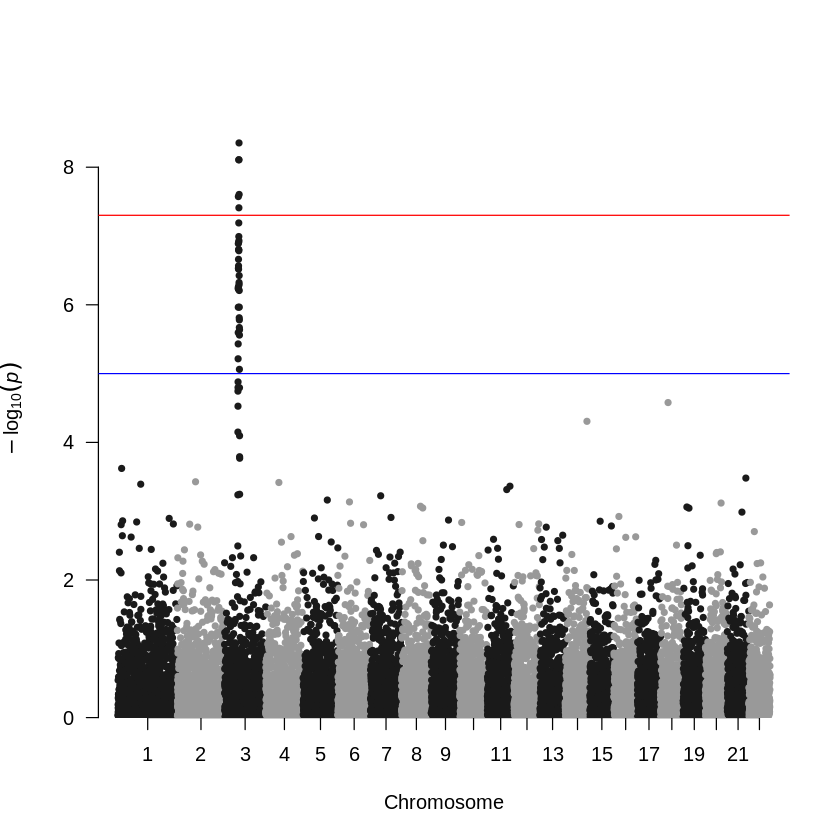

In [159]:
manhattan(gwasResults)

In [157]:
SNP <- df_merge$genes
CHR <- as.integer(df_merge$chr)
BP <- df_merge$start
P <- df_merge$WestEurasia.Oceania

df <- data.frame(SNP,CHR,BP,P)
df <- na.omit(df)
df

,SNP,CHR,BP,P
,<chr>,<int>,<int>,<dbl>
1,RNF223,1,1009660,-0.00722
2,SLC30A7,1,101407465,0.00000
4,"AMY2A, AMY2B",1,104129328,0.03195
5,C1orf159,1,1049963,-0.00690
6,C1orf159,1,1051484,-0.00573
7,NTNG1,1,107998853,0.00000
8,VAV3,1,108462914,0.00000
9,SLC25A24,1,108729360,0.03109
10,NBPF4,1,108778521,-0.01247


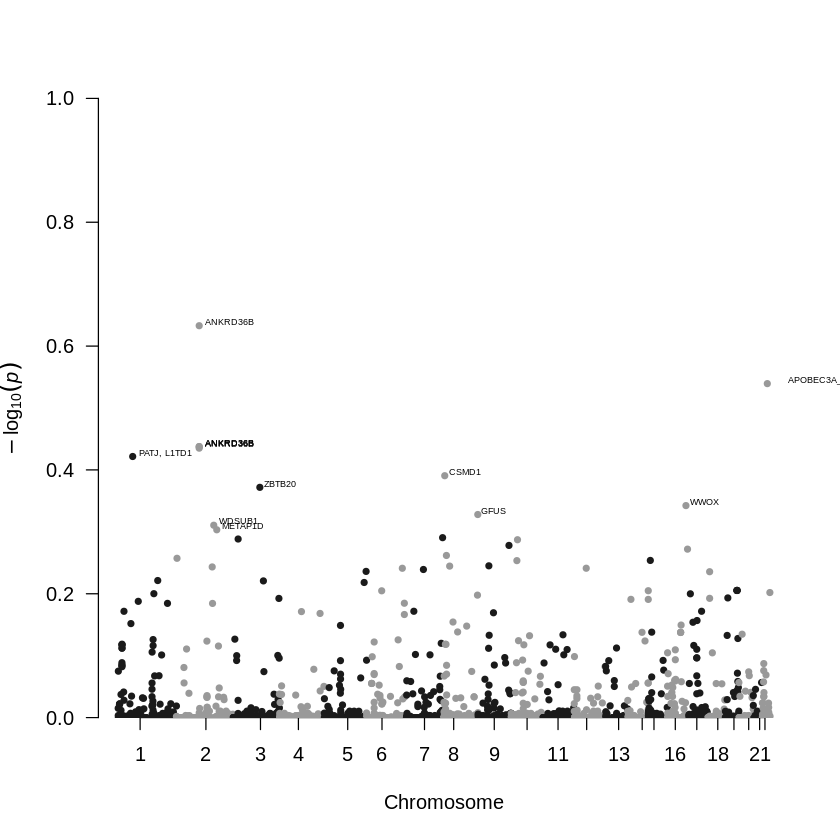

In [169]:
manhattan(df, logp = FALSE, annotatePval= 0.30,  annotateTop = FALSE)